<center>
    <img src="https://storage.googleapis.com/kaggle-datasets-images/5656167/9334344/ec9e27e037faa2f18887979d9929e886/dataset-cover.png?t=2024-09-06-15-30-11" width="300" alt="cognitiveclass.ai logo"  />
</center>

# My first simple linear regression lab in machine learning
## It is about house prices
##### Simple Linear Regression
####


###
## Importing Needed Packages

In [2]:
import numpy as np


In [3]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import pylab as pl

## 
## Reading the data in

In [7]:
df = pd.read_csv("house_price_regression_dataset.csv")
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [8]:
df.tail()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332


##
## Data Exploration

In [9]:
df.describe()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [10]:
cdf = df[["Square_Footage" , "Year_Built" , "Num_Bedrooms" , "House_Price", "Garage_Size", "Lot_Size"]]
cdf.head()


,Square_Footage,Year_Built,Num_Bedrooms,House_Price,Garage_Size,Lot_Size
0,1360,1981,2,2.623829e+05,0,0.599637
1,4272,2016,3,9.852609e+05,1,4.753014
2,3592,2016,1,7.779774e+05,0,3.634823
3,966,1977,1,2.296989e+05,1,2.730667
4,4926,1993,2,1.041741e+06,0,4.699073


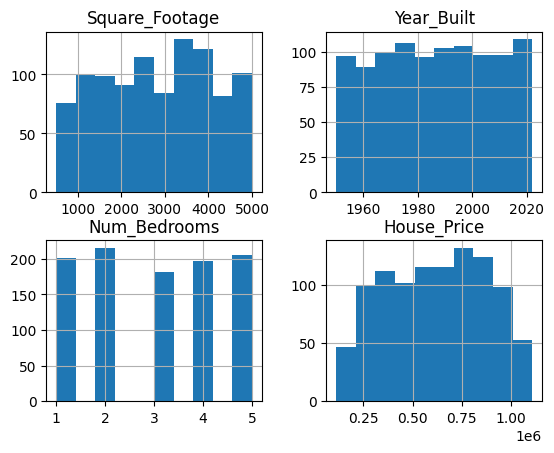

In [11]:
viz = cdf[["Square_Footage" , "Year_Built" , "Num_Bedrooms" , "House_Price"]]
viz.hist()
plt.show()

##

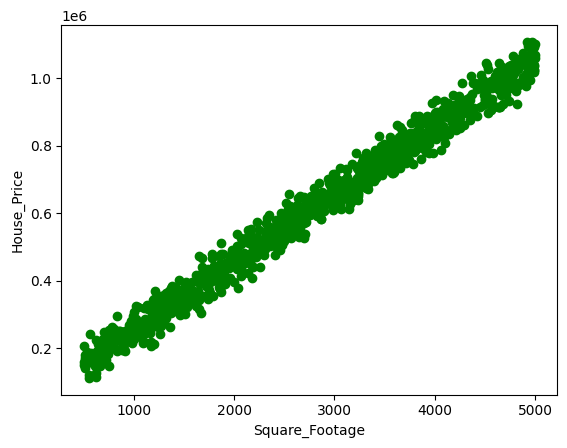

In [12]:
plt.scatter(cdf.Square_Footage, cdf.House_Price, color='green')
plt.xlabel("Square_Footage")
plt.ylabel("House_Price")
plt.show()


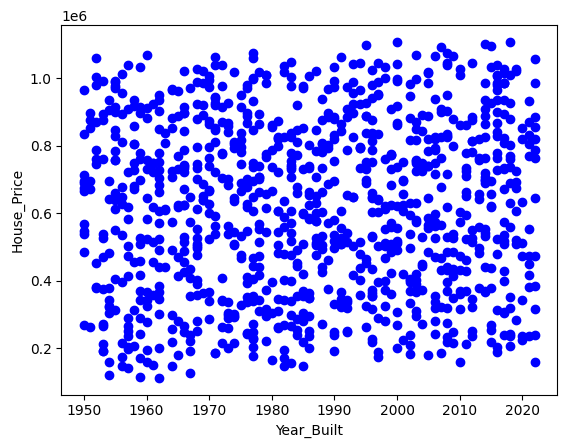

In [13]:
plt.scatter(cdf.Year_Built, cdf.House_Price, color='blue')
plt.xlabel("Year_Built")
plt.ylabel("House_Price")
plt.show()

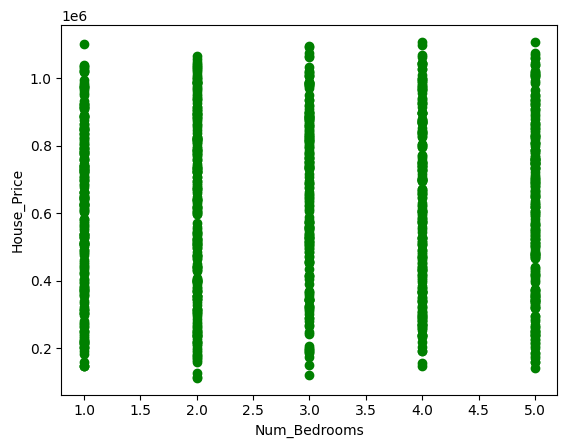

In [14]:
plt.scatter(cdf.Num_Bedrooms, cdf.House_Price, color='green')
plt.xlabel("Num_Bedrooms")
plt.ylabel("House_Price")
plt.show()

###
## Creating train and test dataset

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(msk)
print(~msk)
print(cdf)
print(train)
print(test)

[ True False  True  True False  True  True  True False  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
 False  True  True  True  True  True  True False  True False  True  True
  True False  True  True  True  True False  True  True  True False  True
 False False  True  True  True  True  True False  True False  True False
 False  True  True  True False  True  True  True False  True False  True
  True  True  True  True False  True False False  True  True  True  True
  True False  True  True False False  True  True  True  True False  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True False
  True False  True False False  True  True False  True  True False  True
  True  True False  True  True  True  True  True False  True  True  True
 False  True False  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True Fa

######
#####
# Simple Regression Model

### Train data disrtibution

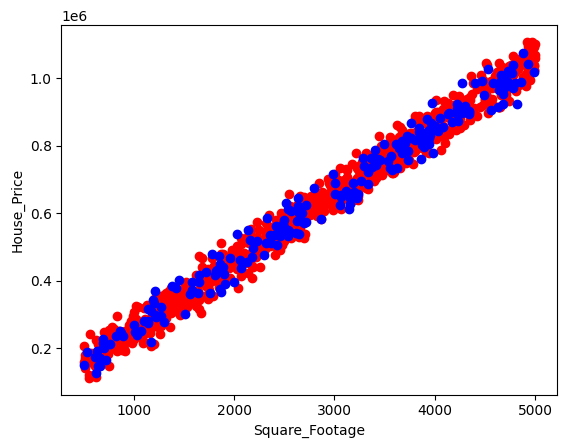

In [16]:
fig = plt.figure()
af1 = fig.add_subplot()
af1.scatter(train.Square_Footage, train.House_Price, color = 'red')
af1.scatter(test.Square_Footage, test.House_Price, color = 'blue')
plt.xlabel("Square_Footage")
plt.ylabel("House_Price")
plt.show()

###
### Modeling

In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Square_Footage']])
train_y = np.asanyarray(train[['House_Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[200.88543619]]
Intercept:  [53529.50064207]


###
### Plot outputs

Text(0, 0.5, 'House_Price')

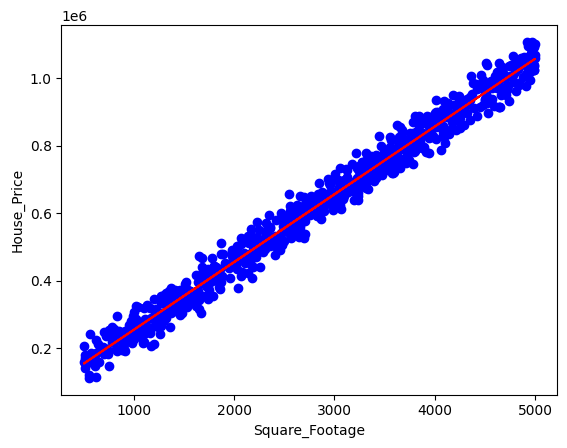

In [18]:
plt.scatter(train.Square_Footage, train.House_Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Square_Footage")
plt.ylabel("House_Price")

###
### Evaluation

In [19]:
from sklearn.metrics import r2_score

In [20]:
test_x = np.asanyarray(test[['Square_Footage']])
test_y = np.asanyarray(test[['House_Price']])
test_y_ = regr.predict(test_x)


print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("MSE: %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 26957.11
MSE: 1160172276.37
R2-score: 0.98


####
## Good Luck !
#### My Github : ARSALANnom
#### My Linkedin : www.linkedin.com/in/arsalannom
####

# THE END !